<a href="https://colab.research.google.com/github/eunji12/Python-Machine-Learning-Study/blob/master/3_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%88%98%ED%95%99%EC%A0%81_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 신경망과의 첫 만남 실습
**서론**
> 2018.10.24 ~ 2018.10.30  
> keras 창시자에게 배우는 딥러닝 - 2장 신경망의 수학적 구성요소   
> 설명이 부족한 부분은 학습 도서의 주피터 노트북 [바로가기](https://github.com/rickiepark/deep-learning-with-python-notebooks) 에서 상세한 설명으로 확인 가능합니다.      
> PYTHON 코드의 주석 달기 및 이해한 내용만 정리했습니다.


#### * 흑백 손글씨 숫자 이미지(28x28픽셀)를 10(0~9)개 범주로 분류하는 문제를 통한 흐름 이해하기
#### 순서
1. MNIST 데이터 셋 로드 및 TRAINING/TEST SET 구성      
2. TRAINING SET을 네트워크에 주입하여 먼저 훈련시킨다. 
3. 2번 작업으로 학습된 데이터가 TEST SET에 대한 예측을 네트워크에 전달(요청)
4. 이 예측이 TEST_LABELS와 맞는지 확인

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

#### from keras.datasets import mnist   
- keras.datasets 에서 minist 를 import    

#### (train_images,train_labels),(test_images,test_labels) = mnist.load_data()   
- mnist데이터를 로드 후 값 할당 : train_images 60,000개 test_image 10,000개, images와 labels 는 각각 1:1 매핑된다.   

#### train_images.shape 
shape : 각 차원의 크기를 알려주는 정수들이 모인 튜플   
(60000, 28, 28) : 28행, 28열의 6만개 데이터


In [0]:
len(train_images)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### train_labels
array([7, 2, 1, ..., 4, 5, 6], dtype=uint8) : 0-9까지의 데이터가 라벨링된 정수형 배열 출력


In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

- 신경망의 데이터 처리 필터인 layer import


#### network = models.Sequential()
: 순차적 모델(선형 스택 모델) 생성   
: [Sequential model guide](https://keras.io/getting-started/sequential-model-guide/)
#### network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
: network에 layer추가   
: Dense - fully connetec layer (조밀하게 연결된 신경망 층)
#### network.add(layers.Dense(10, activation='softmax'))
: network에 layer추가   
: softmax : 10개의 확률 점수가 들어있는 배열을 반환하는 소프트맥스 층, 현재의 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### network complie에 필요한 3가지 단계
- optimizer, loss(cost, loss, objective function), metrics : 옵티마이저, 손실함수, 측정항목
- rmsprop : 옵티마이저 알고리즘의 종류 
- categorical_crossentropy : 손실 함수의 종류
- accuracy :측정 항목으로 정확도를 줌(정확히 분류된 이미지의 비율) 만 고려.

In [0]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

#### training 전 데이터의 전처리 작업
- image 데이터를 네트워크에 맞는 크기로 바꾸고(네트워크에 맞는 크기??)   0 ~ 1 사이의 값으로 스케일을 조정한다.
-   `[0, 255]` 사이의 값인 `uint8` 타입의 `(60000, 28, 28)` 크기를 가진 배열로 저장되어 있는 트레이닝 이미지를    
0과 1 사이의 값을 가지는 `float32` 타입의 `(60000, 28 * 28)` 크기의 배열로 바꾼다.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- 자세한 설명은 추 후. to_categorical을 사용하여 레이블을 범주형으로 인코딩한다.

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2553 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1028 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0690 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0502 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0372 - acc: 0.9892


In [0]:
test_loss, test_acc= network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 46us/step


In [0]:
print('test_loss:',test_loss,'test_acc:',test_acc)

test_loss: 0.06111577018849784 test_acc: 0.9815


#### network.fit(train_images, train_labels, epochs=5, batch_size=128
- fit 메서드를 호출하여 훈련데이터에 모델을 학습시킨다.
- 60,000개의 데이터를 128개씩 쪼개서 반복 (469 interation) 트레이닝, 전체 학습 총 5번(5 epochs)

In [0]:
import matplotlib.pyplot as plt

In [0]:
digit = train_images[4]
print(digit)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

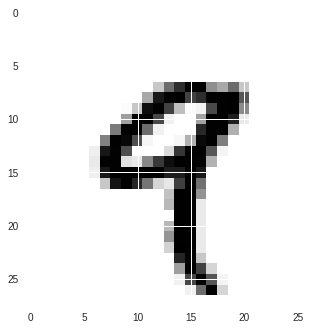

In [0]:
digit = train_images[4]
#print(digit)
plt.imshow(digit.reshape(28,28), cmap=plt.cm.binary)
plt.show()